In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import optimizer as opt
from prob import logistic_loss, l1_constraint, l2_constraint, n_supp_constraint


# load dataset mushroom
x = loadmat('mushroom.mat')
feature = x['mushroom_tr_feature']
label = x['mushroom_tr_label']

# parameters selection
R = 60
n_iter = 500
constraint_type = 'l1'
# constraint_type = 'l2'
# constraint_type = 'n_supp'

# initialization
_, dim = feature.shape
x_init = np.zeros((dim, 1))


l1 norm ball constraint


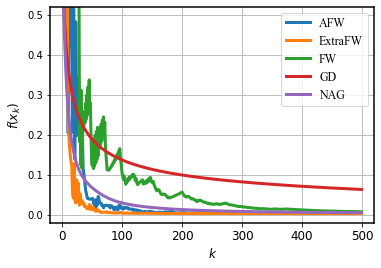

In [2]:
# here's an example for l2 norm ball

loss = logistic_loss(feature, label)
if constraint_type == 'l2':
    constraint = l2_constraint(R)
elif constraint_type == 'l1':
    constraint = l1_constraint(R)
elif constraint_type == 'n_supp':
     # we use n = 2 for all experiments
    constraint = n_supp_constraint(R, 2, dim)
else:
    raise ValueError('Unsupported constraint set. Currently only l1, l2, and, n_supp norm balls are valid choices.')
    

AFW = opt.AFW(x_init, loss, constraint)
afw_loss = [0 for i in range(n_iter)]

ExtraFW = opt.ExtraFW(x_init, loss, constraint)
extrafw_loss = [0 for i in range(n_iter)]

FW = opt.FW(x_init, loss, constraint)
fw_loss = [0 for i in range(n_iter)]

if constraint_type != 'n_supp':
    GD = opt.GD(x_init, loss, constraint)
    gd_loss = [0 for i in range(n_iter)]

    NAG = opt.NAG(x_init, loss, constraint)
    nag_loss = [0 for i in range(n_iter)]


for i in range(n_iter):
    afw_loss[i] = AFW.step()
    extrafw_loss[i] = ExtraFW.step()
    fw_loss[i] = FW.step()
    if constraint_type != 'n_supp':
        gd_loss[i] = GD.step()
        nag_loss[i] = NAG.step()
    

print('{} norm ball constraint'.format(constraint_type))
fig, ax = plt.subplots()

plt.plot(np.asarray(afw_loss), linewidth=3, label='AFW')
plt.plot(np.asarray(extrafw_loss), linewidth=3, label='ExtraFW')
plt.plot(np.asarray(fw_loss), linewidth=3, label='FW')
if constraint_type != 'n_supp':
    plt.plot(np.asarray(gd_loss), linewidth=3, label='GD')
    plt.plot(np.asarray(nag_loss), linewidth=3, label='NAG')


plt.rcParams["font.family"] = "Times New Roman"
plt.subplots_adjust(left=0.19, right=0.94, bottom=0.13)
legend = plt.legend(loc='upper right', shadow=False, fontsize=12, fancybox = True)
plt.ylim([-0.02,0.52])
plt.xlim([-20, 520])
plt.grid(b=True, which='major')
plt.xticks([0,100,200,300, 400,500], fontsize=12)

ax=plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)

plt.xlabel('$k$',fontsize=12)
plt.ylabel('$f(x_k)$',fontsize=12)

plt.show()
